## Import python packages

In [553]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('All packages imported successfully!')

All packages imported successfully!


## Explore the dataset

In [554]:
# Original dataset was xlsx, convert to csv
df = pd.DataFrame(pd.read_excel("data/1688640705_hr_comma_sep.xlsx")) 
df.to_csv("data/hr_comma_sep.cvs", index=False)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [555]:
# Checking columns / rows dimensions & types
columns = list(df.columns)
dimensions = df.shape
print(
    f"Dimensions {dimensions} Data contains {dimensions[0]} rows and {dimensions[1]} columns"
)
print(f"Columns are {list(df.columns)}\n")
print(f"Dataset type: \n{df.dtypes}")

Dimensions (14999, 10) Data contains 14999 rows and 10 columns
Columns are ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Dataset type: 
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


In [556]:
# Checking feature's counts
df.sales.value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

##  Perform data quality checks by checking for missing values, if any

In [557]:
# Check for null 
print("df.info() \n")
print(f"{df.info()} \n ")
print("Check for isna() \n")
print(f"{df.isna().sum()}")

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None 
 
Check for isna() 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left

__Observation__:

- There are no empty rows in the dataset.

##  Understand what factors contributed most to employee turnover by EDA

Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data



In [558]:
# Calculating a Correlation Matrix with Pandas
# Remove sales & salary
df1 = df[columns[:-2]] 
matrix = df1.corr().round(2)
matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


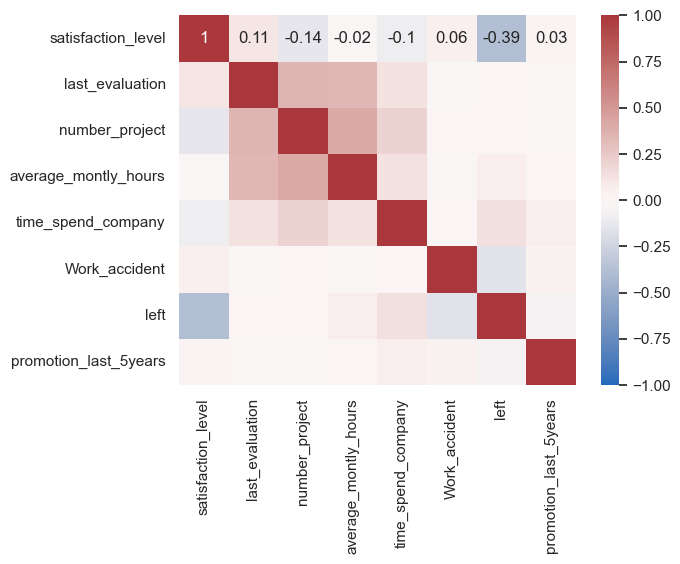

In [559]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
# sns.heatmap(matrix, annot=True,cmap='vlag')
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


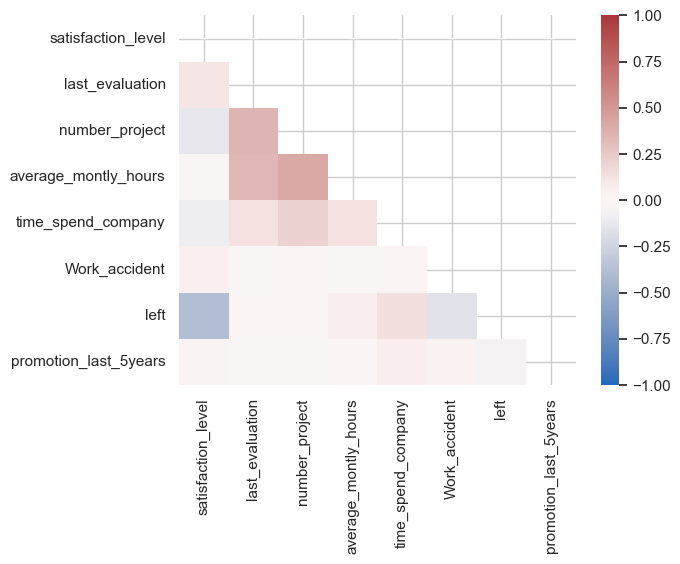

In [560]:
# show the bottom half of our visualization
# triu() function creates a triangle of a matrix.
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [561]:
# matrix = matrix[abs(matrix) >= 0.7]
# matrix
unstack_matrix = matrix.unstack()
unstack_matrix[unstack_matrix < 0]

satisfaction_level     number_project          -0.14
                       average_montly_hours    -0.02
                       time_spend_company      -0.10
                       left                    -0.39
last_evaluation        Work_accident           -0.01
                       promotion_last_5years   -0.01
number_project         satisfaction_level      -0.14
                       promotion_last_5years   -0.01
average_montly_hours   satisfaction_level      -0.02
                       Work_accident           -0.01
time_spend_company     satisfaction_level      -0.10
Work_accident          last_evaluation         -0.01
                       average_montly_hours    -0.01
                       left                    -0.15
left                   satisfaction_level      -0.39
                       Work_accident           -0.15
                       promotion_last_5years   -0.06
promotion_last_5years  last_evaluation         -0.01
                       number_project         

In [573]:
# Remove temporaly 
import warnings
# Displays each FutureWarning only once.
warnings.simplefilter("once", FutureWarning)

__Draw distributions plot of employees__

In [574]:
# Set the esthetic style of the plots
sns.set_theme(style="whitegrid")

In [575]:
# Check for inf before drawing distributions
# ds = df1.isin([np.inf, -np.inf])
# print(ds) 
print("Printing the count of infinity values \n") 
count = np.isinf(df1).values.sum() 
print("DF contains " + str(count) + " infinite values") 
c_inf = np.isinf(df['satisfaction_level']).values.sum() 
print("Feature 'satisfaction_level' contains " + str(c_inf) + " infinite values") 

df1 = df1.replace([np.inf, -np.inf], np.nan)
c_na = df1['satisfaction_level'].isna().sum()
print("Feature 'satisfaction_level' contains " + str(c_na) + " NaN values") 

print
df['satisfaction_level'].describe()

Printing the count of infinity values 

DF contains 0 infinite values
Feature 'satisfaction_level' contains 0 infinite values
Feature 'satisfaction_level' contains 0 NaN values


count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

(array([1121.,  424.,  288.,  253.,  829., 1173.,  911., 1136., 1199.,
        1162., 1335., 1386., 1354., 1235., 1193.]),
 array([0.09      , 0.15066667, 0.21133333, 0.272     , 0.33266667,
        0.39333333, 0.454     , 0.51466667, 0.57533333, 0.636     ,
        0.69666667, 0.75733333, 0.818     , 0.87866667, 0.93933333,
        1.        ]),
 <BarContainer object of 15 artists>)

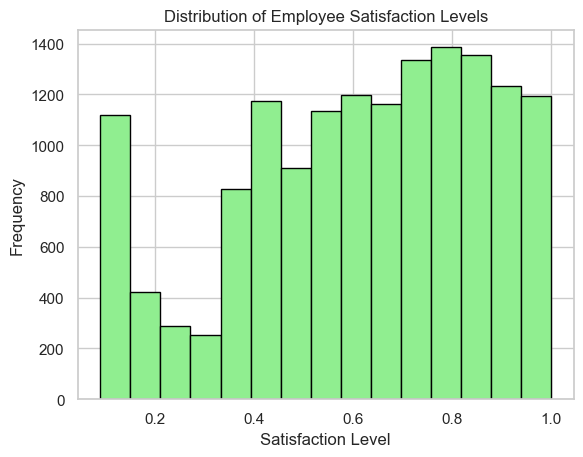

In [576]:
plt.title('Distribution of Employee Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.hist(df['satisfaction_level'], color='lightgreen', ec='black', bins=15)

We can observe that the satisfaction level of employes is high.


Adding  KDE overlay to highlight the underlying distribution pattern.
 
The following plots show the frequency distribution of:  

- Employee Satisfaction
- Employee Evaluation
- Employee Average Monthly Hours


/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


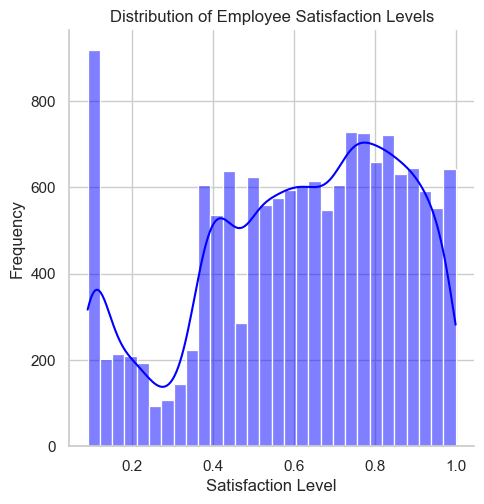

In [589]:
# Plot the distribution of employee satisfaction levels
sns.displot(df['satisfaction_level'], kde=True, color='blue')
# sns.histplot(df1['satisfaction_level'], kde=True, color='blue')
plt.title('Distribution of Employee Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


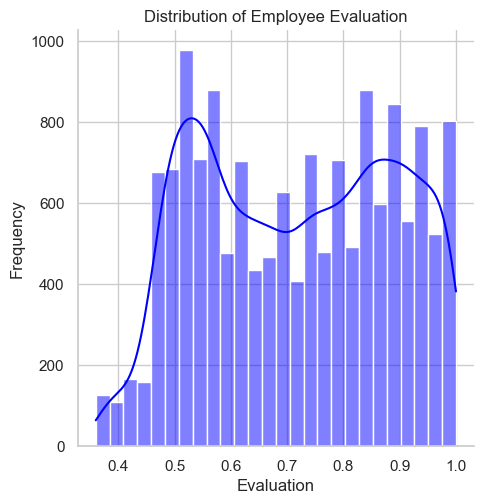

In [590]:
# Plot the distribution of employee evaluation
sns.displot(df['last_evaluation'], kde=True, color='blue')
# sns.histplot(df1['satisfaction_level'], kde=True, color='blue')
plt.title('Distribution of Employee Evaluation')
plt.xlabel('Evaluation')
plt.ylabel('Frequency')
plt.show()

It shows that there is a significant number of employees with evaluations around 0.5 and another group with evaluations around 0.9. Evaluations tend to cluster around those two values. 